In [1]:
import pandas as pd

df = pd.read_csv("sales_data_sample.csv", encoding='ISO-8859-1') 
df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
df.shape

(2823, 25)

In [5]:
df.columns 

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [9]:
df["ORDERDATE"] = pd.to_datetime(df["ORDERDATE"])


In [14]:
df["YEAR"] = df["ORDERDATE"].dt.year
df["MONTH"] = df["ORDERDATE"].dt.month
df["QUARTER"] = df["ORDERDATE"].dt.quarter


In [20]:
df.isnull().sum()


ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
YEAR                   0
MONTH                  0
QUARTER                0
dtype: int64

In [22]:
df.drop(columns=["ADDRESSLINE2"], inplace=True)



In [30]:
df["STATE"] = df["STATE"].fillna("Unknown")



In [32]:
df["TERRITORY"] = df["TERRITORY"].fillna("Unknown")


In [34]:
df["TERRITORY"] = df["TERRITORY"].fillna("Unknown")

In [46]:
product_sales = df.groupby("PRODUCTLINE")["SALES"].sum().sort_values(ascending=False)
product_sales


PRODUCTLINE
Classic Cars        3919615.66
Vintage Cars        1903150.84
Motorcycles         1166388.34
Trucks and Buses    1127789.84
Planes               975003.57
Ships                714437.13
Trains               226243.47
Name: SALES, dtype: float64

In [42]:
product_sales.sort_values().head(5) 


PRODUCTLINE
Trains               226243.47
Ships                714437.13
Planes               975003.57
Trucks and Buses    1127789.84
Motorcycles         1166388.34
Name: SALES, dtype: float64

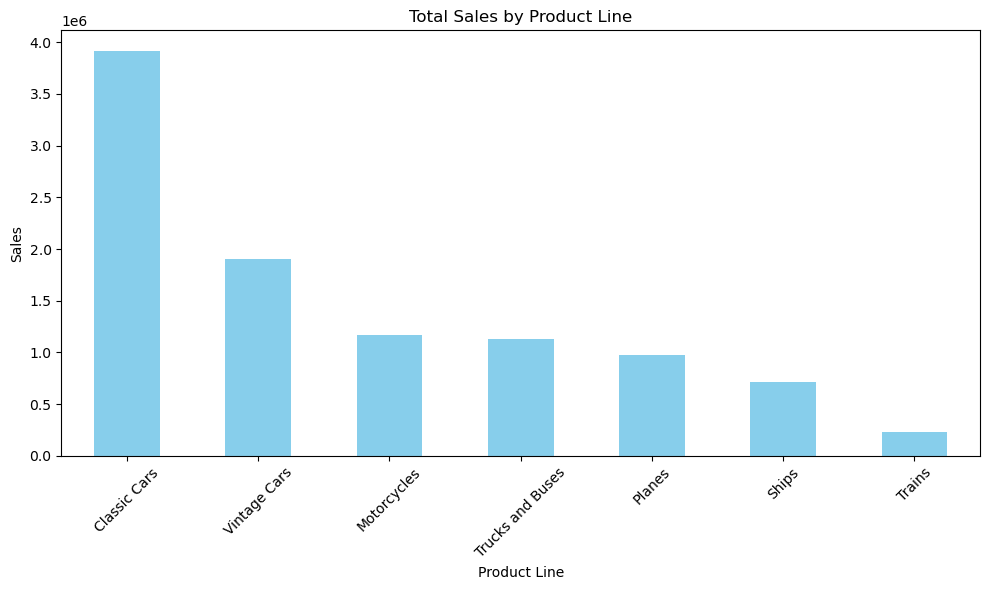

In [48]:
import matplotlib.pyplot as plt

product_sales.plot(kind='bar', color='skyblue', figsize=(10,6))
plt.title("Total Sales by Product Line")
plt.ylabel("Sales")
plt.xlabel("Product Line")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [51]:
cancelled_orders = df[df["STATUS"] == "Cancelled"]
cancelled_counts = cancelled_orders["PRODUCTLINE"].value_counts()
cancelled_counts


PRODUCTLINE
Ships           18
Classic Cars    16
Vintage Cars    13
Planes          12
Trains           1
Name: count, dtype: int64

In [53]:
low_selling_products = df.groupby("PRODUCTCODE")["SALES"].sum().sort_values().head(10)
low_selling_products


PRODUCTCODE
S24_3969    33181.66
S32_2206    41353.43
S24_2022    44667.16
S24_2972    46515.92
S24_1628    46676.51
S24_2840    47235.48
S24_1937    47981.09
S50_1341    50217.95
S72_1253    51661.82
S18_1367    52045.03
Name: SALES, dtype: float64

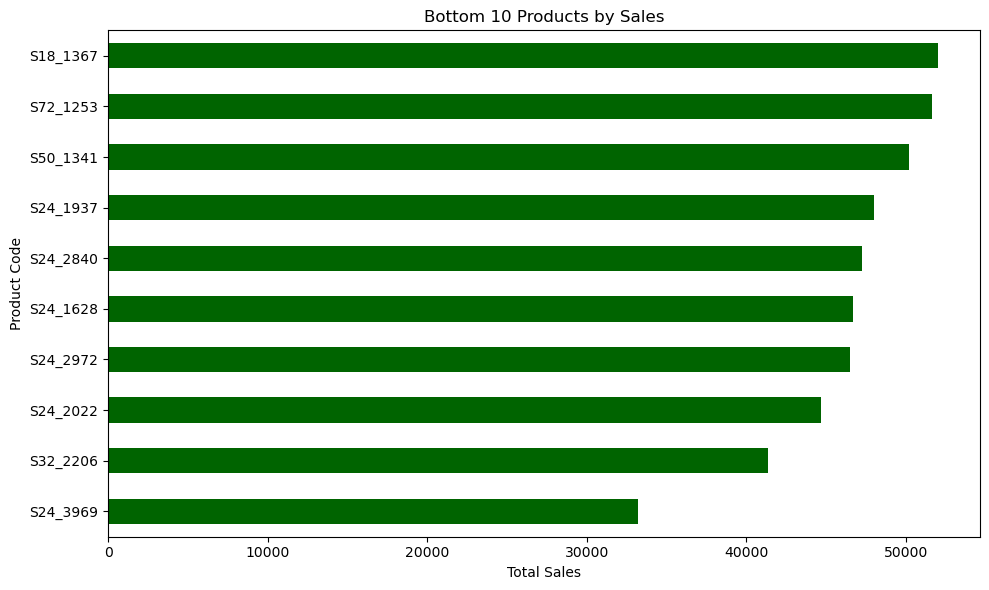

In [59]:
low_selling_products.plot(kind="barh", figsize=(10, 6), color="darkgreen")
plt.title("Bottom 10 Products by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product Code")
plt.tight_layout()
plt.show()


In [61]:
total_sales = df.groupby("PRODUCTCODE")["SALES"].sum()

In [63]:
total_quantity = df.groupby("PRODUCTCODE")["QUANTITYORDERED"].sum()

In [65]:
product_line = df.groupby("PRODUCTCODE")["PRODUCTLINE"].first()

In [ ]:
cancelled_counts = df[df["STATUS"] == "Cancelled"].groupby("PRODUCTCODE")["STATUS"].count()

In [85]:
product_summary = pd.DataFrame({
    "ProductLine": product_line,
    "TotalSales": total_sales,
    "TotalQuantity": total_quantity,
    "CancelledOrders": cancelled_counts
})

product_summary["CancelledOrders"].fillna(0, inplace=True)

product_summary = product_summary.sort_values(by="TotalSales")
product_summary.head(10)


C:\Users\jingl\AppData\Local\Temp\ipykernel_31108\1350624231.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  product_summary["CancelledOrders"].fillna(0, inplace=True)


,ProductLine,TotalSales,TotalQuantity,CancelledOrders
S24_3969,Vintage Cars,33181.66,745.0,0.0
S32_2206,Motorcycles,41353.43,836.0,0.0
S24_2022,Vintage Cars,44667.16,851.0,0.0
S24_2972,Classic Cars,46515.92,912.0,0.0
S24_1628,Classic Cars,46676.51,883.0,0.0
S24_2840,Classic Cars,47235.48,983.0,0.0
S24_1937,Vintage Cars,47981.09,844.0,0.0
S50_1341,Vintage Cars,50217.95,999.0,0.0
S72_1253,Planes,51661.82,920.0,0.0
S18_1367,Vintage Cars,52045.03,890.0,0.0


In [87]:
def recommend(row):
    if row["TotalSales"] < 5000 and row["TotalQuantity"] < 20:
        return "❌ stop"
    elif row["TotalSales"] < 10000 or row["TotalQuantity"] < 50:
        return "⚠️ watch"
    else:
        return "✔️ keep"

product_summary["advice"] = product_summary.apply(recommend, axis=1)


In [89]:
product_summary.to_csv("advice.csv", encoding="utf-8", index=True)
product_summary.head(10)

,ProductLine,TotalSales,TotalQuantity,CancelledOrders,advice
S24_3969,Vintage Cars,33181.66,745.0,0.0,✔️ keep
S32_2206,Motorcycles,41353.43,836.0,0.0,✔️ keep
S24_2022,Vintage Cars,44667.16,851.0,0.0,✔️ keep
S24_2972,Classic Cars,46515.92,912.0,0.0,✔️ keep
S24_1628,Classic Cars,46676.51,883.0,0.0,✔️ keep
S24_2840,Classic Cars,47235.48,983.0,0.0,✔️ keep
S24_1937,Vintage Cars,47981.09,844.0,0.0,✔️ keep
S50_1341,Vintage Cars,50217.95,999.0,0.0,✔️ keep
S72_1253,Planes,51661.82,920.0,0.0,✔️ keep
S18_1367,Vintage Cars,52045.03,890.0,0.0,✔️ keep


In [95]:
low_sales_low_quantity = product_summary[
    (product_summary["TotalSales"] < 10000) & (product_summary["TotalQuantity"] < 50)
]

low_sales_low_quantity.sort_values(by="TotalSales").head()


,ProductLine,TotalSales,TotalQuantity,CancelledOrders,advice


In [97]:
low_sales_low_quantity.shape


(0, 5)

In [ ]:
Analysis revealed no immediate need for product discontinuation, but identified key watchlist items for continued observation